<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/hissesorgu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Cloning https://github.com/rongardF/tvdatafeed to /tmp/pip-req-build-53amwe_8
  Running command git clone --filter=blob:none --quiet https://github.com/rongardF/tvdatafeed /tmp/pip-req-build-53amwe_8
  Resolved https://github.com/rongardF/tvdatafeed to commit e6f6aaa7de439ac6e454d9b26d2760ded8dc4923
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 755.7 kB/s eta 0:00:00
  Created wheel for tvdatafeed: filename=tvdatafeed-2.1.0-py3-none-any.whl size=17532 sha256=aadf9966184b238f6ff7d99d3fbd403e70c916c3224c9565ef5c2462de6a5108
  Stored in directory: /tmp/pip-ephem-wheel-cache-tmafu9tm/wheels/e4/32/1e/21ebcacc6549d75fae3bf3ff75cee8fcbe4e5c189d88fbd5a1
Successfully built tvdatafeed
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=59d85eaae65bbd5c2d9d5048f5f9945c6c0ef2849d82d0ecffd6bd4c6e249dfb
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c658

Kaç hisse gireceksiniz (maksimum 10)? 3
1. hisse adını girin (örneğin, 'ASELS'): thyao
2. hisse adını girin (örneğin, 'ASELS'): asels
3. hisse adını girin (örneğin, 'ASELS'): doas


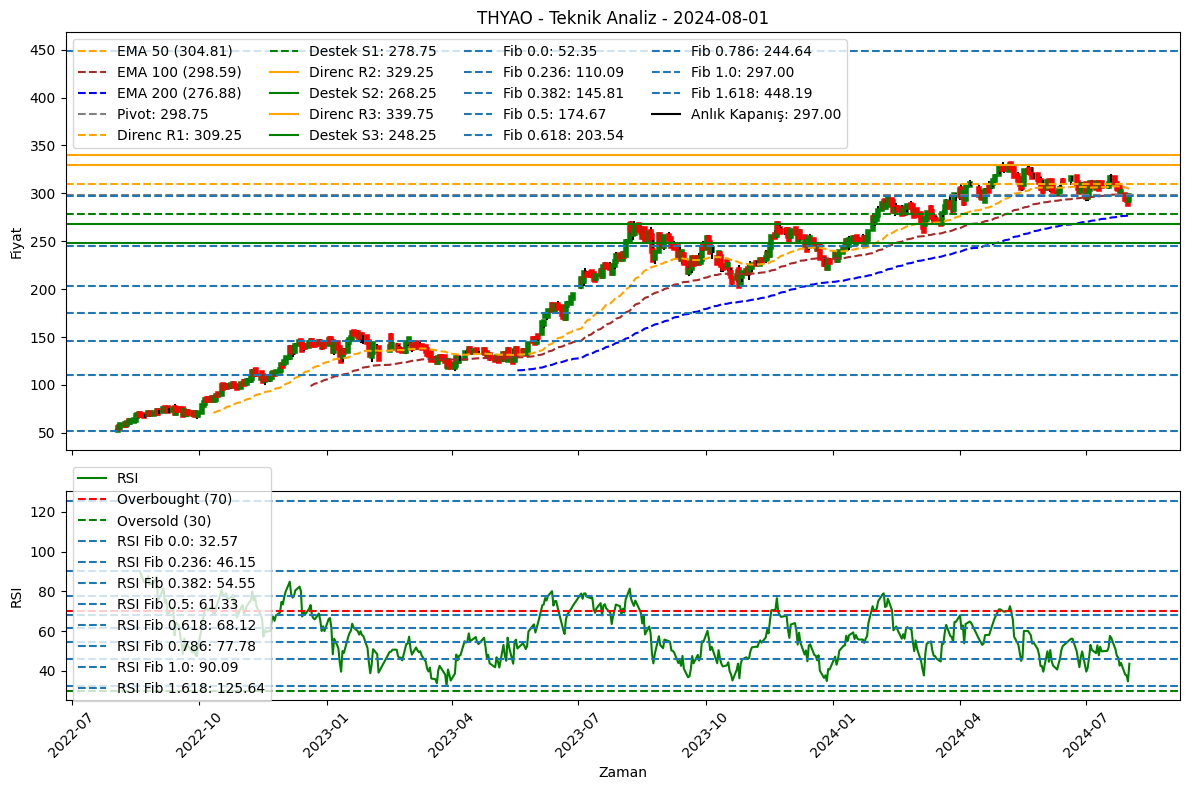

THYAO için günlük fiyat hareketleri ve teknik analiz grafiği oluşturuldu.


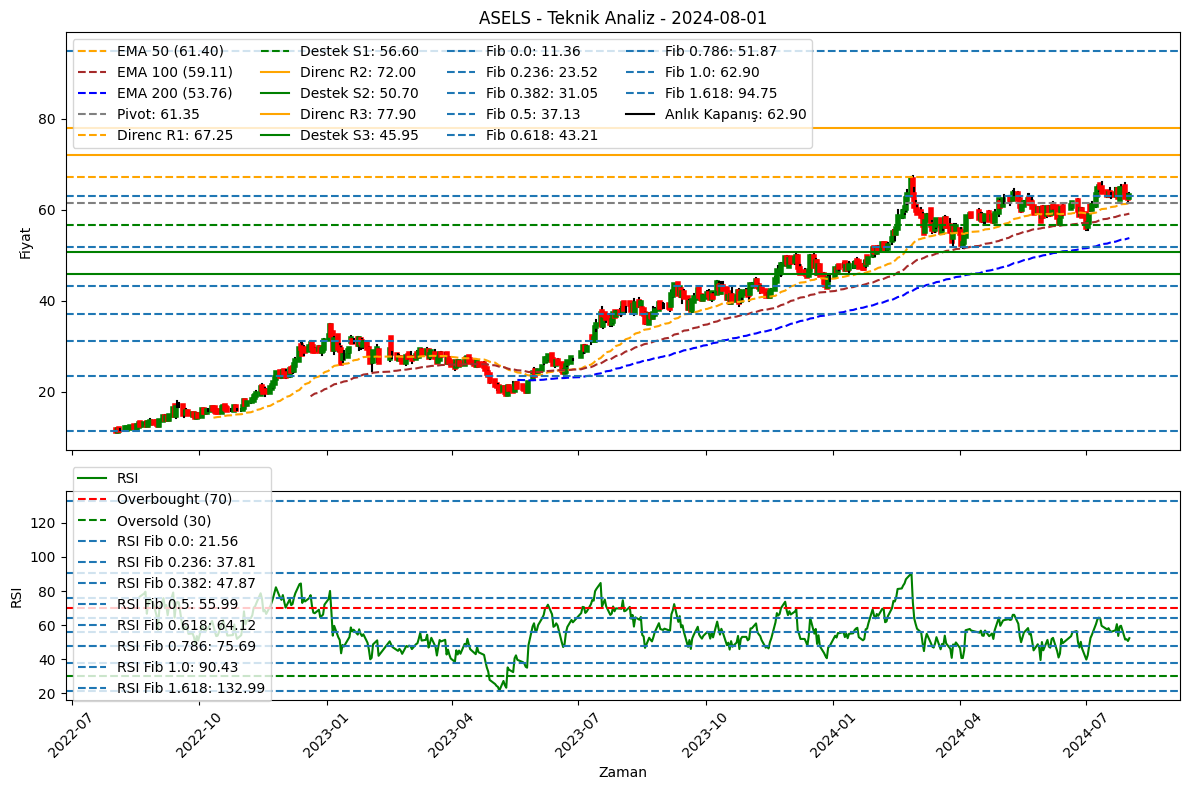

ASELS için günlük fiyat hareketleri ve teknik analiz grafiği oluşturuldu.


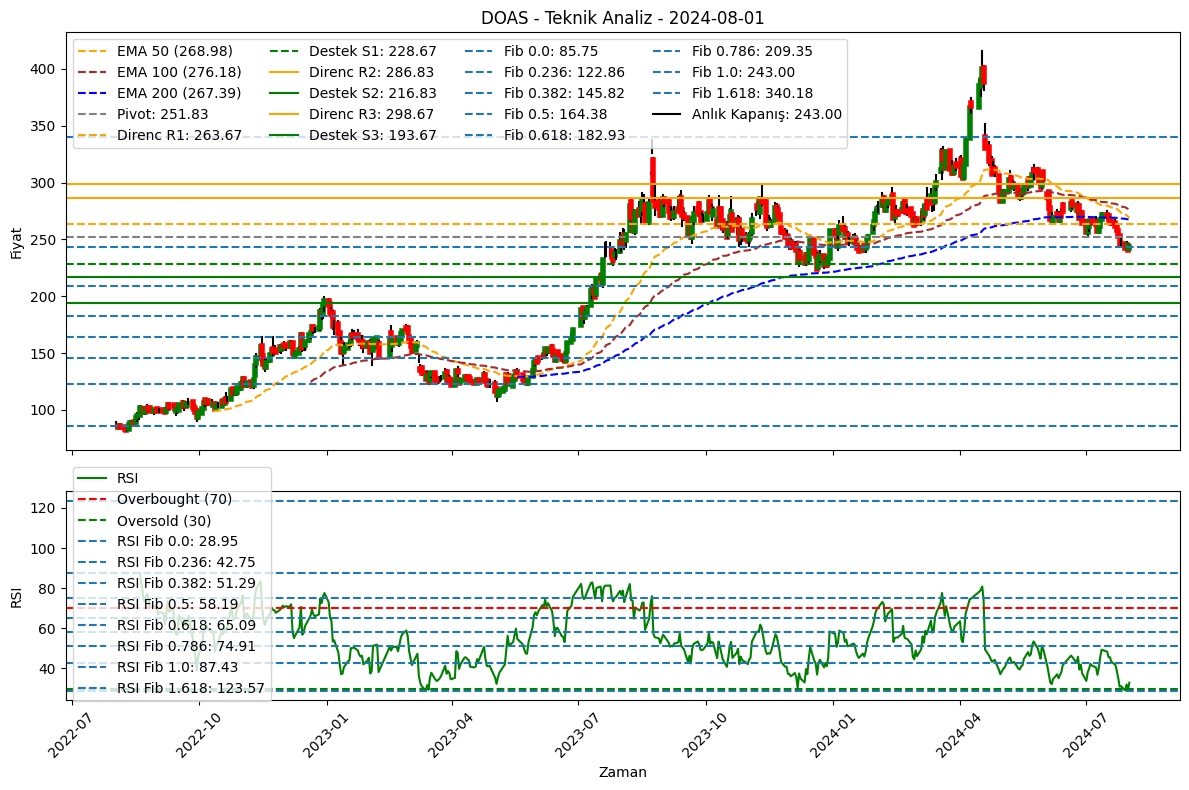

DOAS için günlük fiyat hareketleri ve teknik analiz grafiği oluşturuldu.


In [ ]:
# Gerekli kütüphaneleri yükleyin
!pip install git+https://github.com/rongardF/tvdatafeed tradingview-screener matplotlib openpyxl
!pip install ta

import pandas as pd
import numpy as np
from tvDatafeed import TvDatafeed, Interval
import matplotlib.pyplot as plt
import ta
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# RSI hesaplama fonksiyonu
def calculate_rsi(data, window=14):
    return ta.momentum.RSIIndicator(data['Close'], window).rsi()

# Geleneksel aylık pivot seviyelerini hesaplama fonksiyonu
def calculate_monthly_pivot_levels(data):
    high = data['High'].resample('M').max().iloc[-2]
    low = data['Low'].resample('M').min().iloc[-2]
    close = data['Close'].resample('M').last().iloc[-2]
    pivot = (high + low + close) / 3
    r1 = 2 * pivot - low
    s1 = 2 * pivot - high
    r2 = pivot + (high - low)
    s2 = pivot - (high - low)
    r3 = high + 2 * (pivot - low)
    s3 = low - 2 * (high - pivot)
    return pivot, r1, s1, r2, s2, r3, s3

# Fibonacci seviyelerini hesaplama fonksiyonu
def calculate_fibonacci_levels(start_price, end_price):
    diff = end_price - start_price
    fib_levels = {
        '0.0': start_price,
        '0.236': start_price + 0.236 * diff,
        '0.382': start_price + 0.382 * diff,
        '0.5': start_price + 0.5 * diff,
        '0.618': start_price + 0.618 * diff,
        '0.786': start_price + 0.786 * diff,
        '1.0': end_price,
        '1.618': start_price + 1.618 * diff
    }
    return fib_levels

# RSI için Fibonacci seviyelerini hesaplama fonksiyonu
def calculate_rsi_fibonacci_levels(data):
    rsi = calculate_rsi(data)
    start_price = rsi.min()
    end_price = rsi.max()
    return calculate_fibonacci_levels(start_price, end_price)

def draw_candlestick_chart(data, symbol):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Çubuk grafik çizimi
    for idx, row in data.iterrows():
        color = 'green' if row['Close'] >= row['Open'] else 'red'
        ax1.plot([idx, idx], [row['Low'], row['High']], color='black')
        ax1.plot([idx, idx], [row['Open'], row['Close']], color=color, linewidth=4)

    ax1.set_title(f'{symbol} - Teknik Analiz - {pd.Timestamp.today().date()}')
    ax1.set_ylabel('Fiyat')

    # Hareketli Ortalamalar
    data['EMA50'] = ta.trend.EMAIndicator(data['Close'], window=50).ema_indicator()
    data['EMA100'] = ta.trend.EMAIndicator(data['Close'], window=100).ema_indicator()
    data['EMA200'] = ta.trend.EMAIndicator(data['Close'], window=200).ema_indicator()

    close_value = data['Close'].iloc[-1]
    ax1.plot(data.index, data['EMA50'], label=f'EMA 50 ({data["EMA50"].iloc[-1]:.2f})', linestyle='--', color='orange')
    ax1.plot(data.index, data['EMA100'], label=f'EMA 100 ({data["EMA100"].iloc[-1]:.2f})', linestyle='--', color='brown')
    ax1.plot(data.index, data['EMA200'], label=f'EMA 200 ({data["EMA200"].iloc[-1]:.2f})', linestyle='--', color='blue')

    # Geleneksel aylık pivot seviyeleri
    pivot, r1, s1, r2, s2, r3, s3 = calculate_monthly_pivot_levels(data)
    ax1.axhline(pivot, color='gray', linestyle='--', label=f'Pivot: {pivot:.2f}')
    ax1.axhline(r1, color='orange', linestyle='--', label=f'Direnc R1: {r1:.2f}')
    ax1.axhline(s1, color='green', linestyle='--', label=f'Destek S1: {s1:.2f}')
    ax1.axhline(r2, color='orange', linestyle='-', label=f'Direnc R2: {r2:.2f}')
    ax1.axhline(s2, color='green', linestyle='-', label=f'Destek S2: {s2:.2f}')
    ax1.axhline(r3, color='orange', linestyle='-', label=f'Direnc R3: {r3:.2f}')
    ax1.axhline(s3, color='green', linestyle='-', label=f'Destek S3: {s3:.2f}')

    # Fibonacci seviyeleri
    fib_levels = calculate_fibonacci_levels(data['Close'].iloc[0], data['Close'].iloc[-1])
    for level, price in fib_levels.items():
        ax1.axhline(price, linestyle='--', label=f'Fib {level}: {price:.2f}')

    # RSI göstergesi
    data['RSI'] = calculate_rsi(data)
    ax2.plot(data.index, data['RSI'], label='RSI', color='green')
    ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    # RSI için Fibonacci seviyeleri
    rsi_fib_levels = calculate_rsi_fibonacci_levels(data)
    for level, price in rsi_fib_levels.items():
        ax2.axhline(price, linestyle='--', label=f'RSI Fib {level}: {price:.2f}')

    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Zaman')

    # Efsane yerleşimi
    ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=4)
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 1.15))

    # Menüyü güncelle
    close_label = f'Anlık Kapanış: {close_value:.2f}'
    handles, labels = ax1.get_legend_handles_labels()
    handles.append(plt.Line2D([0], [0], color='black'))
    labels.append(close_label)
    ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(0, 1), ncol=4)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{symbol}_technical_analysis.png')
    plt.show()

# TvDatafeed'i başlat
tv = TvDatafeed()

# Kullanıcıdan hisse sayısını al
while True:
    try:
        num_stocks = int(input("Kaç hisse gireceksiniz (maksimum 10)? "))
        if 1 <= num_stocks <= 10:
            break
        else:
            print("Lütfen 1 ile 10 arasında bir sayı girin.")
    except ValueError:
        print("Geçerli bir sayı girin.")

# Kullanıcının gireceği hisse isimlerini topla
symbols = []
for i in range(num_stocks):
    while True:
        symbol = input(f"{i+1}. hisse adını girin (örneğin, 'ASELS'): ").strip().upper()
        if symbol:
            symbols.append(symbol)
            break
        else:
            print("Geçerli bir hisse adı girin.")

# Her bir hisse için veri çek ve grafik oluştur
for symbol in symbols:
    try:
        data = tv.get_hist(symbol=symbol, exchange='BIST', interval=Interval.in_daily, n_bars=500)
        data.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)
        data = data.reset_index()
        data['datetime'] = pd.to_datetime(data['datetime'])
        data.set_index('datetime', inplace=True)

        # Grafiği çiz
        draw_candlestick_chart(data, symbol)

        print(f"{symbol} için günlük fiyat hareketleri ve teknik analiz grafiği oluşturuldu.")
    except Exception as e:
        print(f"{symbol} için veri çekilirken hata oluştu: {e}")
